In [564]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from joblib import dump, load

# Indicator

In [361]:
X_climate = pd.read_csv('../climate_db_pivoted_filled_add6m.csv')
X_climate

geo  year  -6_fpanv_MEDIAN  -5_fpanv_MEDIAN  -4_fpanv_MEDIAN  \
0      AL011  2001              NaN              NaN              NaN   
1      AL011  2002              NaN              NaN              NaN   
2      AL011  2003              NaN              NaN              NaN   
3      AL011  2004              NaN              NaN              NaN   
4      AL011  2005              NaN              NaN              NaN   
...      ...   ...              ...              ...              ...   
28761  UKN0G  2015           -0.003           -0.470            1.216   
28762  UKN0G  2016           -1.067           -0.260           -0.604   
28763  UKN0G  2017            0.165            1.423           -0.055   
28764  UKN0G  2018            0.949           -0.216           -0.587   
28765  UKN0G  2019            0.611           -0.310           -0.392   

       -3_fpanv_MEDIAN  -2_fpanv_MEDIAN  -1_fpanv_MEDIAN  1_fpanv_MEDIAN  \
0                  NaN              NaN              NaN             NaN   
1                  NaN              NaN              NaN             NaN   
2                  NaN              NaN              NaN             NaN   
3                  NaN              NaN              NaN             NaN   
4                  NaN              NaN              NaN             NaN   
...                ...              ...              ...             ...   
28761            0.621           -0.130         0.190365       -0.341059   
28762            0.571            1.193         0.561590        0.111726   
28763           -0.134            0.199         0.355836       -1.132818   
28764           -1.599           -1.447        -0.225984        0.613701   
28765            0.462            0.132        -0.043964             NaN   

       2_fpanv_MEDIAN  ...  3_tpmax_MEDIAN  4_tpmax_MEDIAN  5_tpmax_MEDIAN  \
0                 NaN  ...          12.897          13.449          19.454   
1                 NaN  ...          11.130          12.832          19.266   
2                 NaN  ...           8.916          11.864          21.480   
3                 NaN  ...           9.930          14.878          16.196   
4                 NaN  ...           7.243          13.397          19.105   
...               ...  ...             ...             ...             ...   
28761           0.083  ...           8.161          12.031          11.943   
28762           1.159  ...           9.511          10.929          16.119   
28763          -0.146  ...          10.554          11.598          18.217   
28764           0.047  ...           5.341          10.518          16.554   
28765             NaN  ...             NaN             NaN             NaN   

       6_tpmax_MEDIAN  7_tpmax_MEDIAN  8_tpmax_MEDIAN  9_tpmax_MEDIAN  \
0              22.320          26.497          27.933          20.997   
1              24.070          25.711          23.797          17.923   
2              26.397          27.897          28.508          20.175   
3              21.878          25.564          25.378          21.378   
4              21.306          25.197          24.761          20.078   
...               ...             ...             ...             ...   
28761          15.555          16.887          17.642          15.554   
28762          18.054          19.054          18.786          17.016   
28763          17.554          18.923          17.324          14.999   
28764          20.147          20.110          17.405          15.269   
28765             NaN             NaN             NaN             NaN   

       10_tpmax_MEDIAN  11_tpmax_MEDIAN  12_tpmax_MEDIAN  
0               17.794            9.844            0.070  
1               15.753           11.597            4.196  
2               15.040           11.878            5.897  
3               16.033           11.083            7.097  
4               15.378            7.531            4.378  
...                ...              ...            

In [362]:
X_HWI = pd.read_csv('../HWI_pivoted_add6m.csv')
X_HWI.drop('Unnamed: 0', axis=1, inplace=True)
X_HWI

geo  year  -1_1  -1_10  -1_11  -1_12  -1_13  -1_14  -1_15  -1_16  \
0      AL011  2001   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1      AL011  2003   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2      AL011  2004   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3      AL011  2005   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4      AL011  2007   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...      ...   ...   ...    ...    ...    ...    ...    ...    ...    ...   
27003  UKN0G  2019   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
27004  UKN0G  2020   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
27005  UKN0G  2021   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
27006  UKN0G  2022   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
27007  UKN0G  2023   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

       ...  9_29  9_3  9_30  9_4  9_5  9_6  9_7  9_8       9_9  9_hwi_median  
0      ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  
1      ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  
2      ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  
3      ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  
4      ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  
...    ...   ...  ...   ...  ...  ...  ...  ...  ...       ...           ...  
27003  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  
27004  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      3.273499  
27005  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  1.627201      3.141198  
27006  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  
27007  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.000000      0.000000  

[27008 rows x 570 columns]

# Response

In [363]:
y_agriculture = pd.read_csv('../Economic_agricultural_data_pivoted.csv') # This dataset now also has a 6 month lag included
y_agriculture.drop('Unnamed: 0', axis=1, inplace=True)
y_agriculture

year    geo  area  area_prev_year  empl  empl_prev_year      gdp  \
0      2002  AT111   NaN             NaN   1.6             NaN   627.48   
1      2002  AT112   NaN             NaN   6.0             NaN  2849.41   
2      2002  AT113   NaN             NaN   4.8             NaN  1721.08   
3      2002  AT121   NaN             NaN  12.8             NaN  4888.71   
4      2002  AT122   NaN             NaN   6.2             NaN  4977.23   
...     ...    ...   ...             ...   ...             ...      ...   
22522  2019  SK023   NaN          6344.0   NaN           12.79      NaN   
22523  2019  SK031   NaN          6809.0   NaN            8.73      NaN   
22524  2019  SK032   NaN          9454.0   NaN           12.21      NaN   
22525  2019  SK041   NaN          8973.0   NaN           11.34      NaN   
22526  2019  SK042   NaN          6754.0   NaN            8.86      NaN   

       gdp_prev_year    gva  gva_prev_year     pop  pop_prev_year  
0                NaN   37.0            NaN   37.73            NaN  
1                NaN  142.0            NaN  141.15            NaN  
2                NaN   55.0            NaN   97.62            NaN  
3                NaN  243.0            NaN  237.63            NaN  
4                NaN  116.0            NaN  246.48            NaN  
...              ...    ...            ...     ...            ...  
22522        9123.04    NaN         414.24     NaN         677.50  
22523        9812.27    NaN         117.36     NaN         691.01  
22524        7840.12    NaN         388.79     NaN         648.85  
22525        8632.61    NaN         218.46     NaN         824.23  
22526       10702.43    NaN         235.71     NaN         799.60  

[22527 rows x 12 columns]

In [364]:
y_industrial = pd.read_csv('../Economic_industrial_data_pivoted.csv') # This dataset now also has a 6 month lag included
y_industrial.drop('Unnamed: 0', axis=1, inplace=True)
y_industrial

year    geo  area  area_prev_year  empl  empl_prev_year      gdp  \
0      2002  AT111   NaN             NaN   2.5             NaN   627.48   
1      2002  AT112   NaN             NaN   8.0             NaN  2849.41   
2      2002  AT113   NaN             NaN   6.8             NaN  1721.08   
3      2002  AT121   NaN             NaN  22.7             NaN  4888.71   
4      2002  AT122   NaN             NaN  23.7             NaN  4977.23   
...     ...    ...   ...             ...   ...             ...      ...   
22522  2019  SK023   NaN          6344.0   NaN           80.32      NaN   
22523  2019  SK031   NaN          6809.0   NaN           87.29      NaN   
22524  2019  SK032   NaN          9454.0   NaN           57.69      NaN   
22525  2019  SK041   NaN          8973.0   NaN           69.32      NaN   
22526  2019  SK042   NaN          6754.0   NaN           62.66      NaN   

       gdp_prev_year     gva  gva_prev_year     pop  pop_prev_year  
0                NaN   117.0            NaN   37.73            NaN  
1                NaN   512.0            NaN  141.15            NaN  
2                NaN   434.0            NaN   97.62            NaN  
3                NaN  1497.0            NaN  237.63            NaN  
4                NaN  1440.0            NaN  246.48            NaN  
...              ...     ...            ...     ...            ...  
22522        9123.04     NaN        2832.15     NaN         677.50  
22523        9812.27     NaN        2191.46     NaN         691.01  
22524        7840.12     NaN        1671.93     NaN         648.85  
22525        8632.61     NaN        1692.10     NaN         824.23  
22526       10702.43     NaN        2597.97     NaN         799.60  

[22527 rows x 12 columns]

# Agriculture full dataset

In [365]:
data = pd.merge(left=y_agriculture, right=X_climate,how='left', on=['year', 'geo'])

In [366]:
data.shape

(22527, 156)

In [367]:
data = pd.merge(left=data, right=X_HWI, how='left', on=['year', 'geo'])

In [368]:
data.shape

(22527, 724)

In [369]:
data.to_csv('../full_agriculture_1_year_6_month_window.csv')

In [370]:
data

year    geo  area  area_prev_year  empl  empl_prev_year      gdp  \
0      2002  AT111   NaN             NaN   1.6             NaN   627.48   
1      2002  AT112   NaN             NaN   6.0             NaN  2849.41   
2      2002  AT113   NaN             NaN   4.8             NaN  1721.08   
3      2002  AT121   NaN             NaN  12.8             NaN  4888.71   
4      2002  AT122   NaN             NaN   6.2             NaN  4977.23   
...     ...    ...   ...             ...   ...             ...      ...   
22522  2019  SK023   NaN          6344.0   NaN           12.79      NaN   
22523  2019  SK031   NaN          6809.0   NaN            8.73      NaN   
22524  2019  SK032   NaN          9454.0   NaN           12.21      NaN   
22525  2019  SK041   NaN          8973.0   NaN           11.34      NaN   
22526  2019  SK042   NaN          6754.0   NaN            8.86      NaN   

       gdp_prev_year    gva  gva_prev_year  ...  9_29  9_3  9_30  9_4  9_5  \
0                NaN   37.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
1                NaN  142.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
2                NaN   55.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
3                NaN  243.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
4                NaN  116.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
...              ...    ...            ...  ...   ...  ...   ...  ...  ...   
22522        9123.04    NaN         414.24  ...   0.0  0.0   0.0  0.0  0.0   
22523        9812.27    NaN         117.36  ...   0.0  0.0   0.0  0.0  0.0   
22524        7840.12    NaN         388.79  ...   0.0  0.0   0.0  0.0  0.0   
22525        8632.61    NaN         218.46  ...   0.0  0.0   0.0  0.0  0.0   
22526       10702.43    NaN         235.71  ...   0.0  0.0   0.0  0.0  0.0   

       9_6  9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0  0.0      0.000000  
1      0.0  0.0  0.0  0.0      0.000000  
2      0.0  0.0  0.0  0.0      0.000000  
3      0.0  0.0  0.0  0.0      0.000000  
4      0.0  0.0  0.0  0.0      0.000000  
...    ...  ...  ...  ...           ...  
22522  0.0  0.0  0.0  0.0      1.415074  
22523  0.0  0.0  0.0  0.0      1.121152  
22524  0.0  0.0  0.0  0.0      0.993730  
22525  0.0  0.0  0.0  0.0      1.351481  
22526  0.0  0.0  0.0  0.0      1.276006  

[22527 rows x 724 columns]

# Industrial full dataset

In [371]:
data = pd.merge(left=y_industrial, right=X_climate,how='left', on=['year', 'geo'])
data.shape

(22527, 156)

In [372]:
data = pd.merge(left=data, right=X_HWI, how='left', on=['year', 'geo'])
data.shape

(22527, 724)

In [373]:
data.to_csv('../full_industrial_1_year_6_month_window.csv')

# Compare full datasets

In [239]:
agriculture=pd.read_csv('../full_agriculture_1_year_6_month_window.csv')
industrial=pd.read_csv('../full_industrial_1_year_6_month_window.csv')

In [209]:
tmp = pd.DataFrame({'agri': agriculture.isnull().sum().to_list(), 'indus': industrial.isnull().sum().to_list()})
tmp['diff'] = tmp['agri']-tmp['indus']

In [240]:
tmp.sort_values('diff', ascending=False)

agri  indus  diff
6    1329   1318    11
320  6379   6379     0
319  6379   6379     0
318  6379   6379     0
317  6379   6379     0
..    ...    ...   ...
149  6379   6379     0
148  6379   6379     0
147  6379   6379     0
146  6379   6379     0
160  6379   6379     0

[470 rows x 3 columns]

In [241]:
industrial.gva.isnull().sum()

2682

In [242]:
agriculture.gva.isnull().sum()

2693

# Industrial full dataset, impute missing values

In [374]:
industrial=pd.read_csv('../full_industrial_1_year_6_month_window.csv')
industrial.drop('Unnamed: 0', axis=1, inplace=True)
industrial

year    geo  area  area_prev_year  empl  empl_prev_year      gdp  \
0      2002  AT111   NaN             NaN   2.5             NaN   627.48   
1      2002  AT112   NaN             NaN   8.0             NaN  2849.41   
2      2002  AT113   NaN             NaN   6.8             NaN  1721.08   
3      2002  AT121   NaN             NaN  22.7             NaN  4888.71   
4      2002  AT122   NaN             NaN  23.7             NaN  4977.23   
...     ...    ...   ...             ...   ...             ...      ...   
22522  2019  SK023   NaN          6344.0   NaN           80.32      NaN   
22523  2019  SK031   NaN          6809.0   NaN           87.29      NaN   
22524  2019  SK032   NaN          9454.0   NaN           57.69      NaN   
22525  2019  SK041   NaN          8973.0   NaN           69.32      NaN   
22526  2019  SK042   NaN          6754.0   NaN           62.66      NaN   

       gdp_prev_year     gva  gva_prev_year  ...  9_29  9_3  9_30  9_4  9_5  \
0                NaN   117.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
1                NaN   512.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
2                NaN   434.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
3                NaN  1497.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
4                NaN  1440.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
...              ...     ...            ...  ...   ...  ...   ...  ...  ...   
22522        9123.04     NaN        2832.15  ...   0.0  0.0   0.0  0.0  0.0   
22523        9812.27     NaN        2191.46  ...   0.0  0.0   0.0  0.0  0.0   
22524        7840.12     NaN        1671.93  ...   0.0  0.0   0.0  0.0  0.0   
22525        8632.61     NaN        1692.10  ...   0.0  0.0   0.0  0.0  0.0   
22526       10702.43     NaN        2597.97  ...   0.0  0.0   0.0  0.0  0.0   

       9_6  9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0  0.0      0.000000  
1      0.0  0.0  0.0  0.0      0.000000  
2      0.0  0.0  0.0  0.0      0.000000  
3      0.0  0.0  0.0  0.0      0.000000  
4      0.0  0.0  0.0  0.0      0.000000  
...    ...  ...  ...  ...           ...  
22522  0.0  0.0  0.0  0.0      1.415074  
22523  0.0  0.0  0.0  0.0      1.121152  
22524  0.0  0.0  0.0  0.0      0.993730  
22525  0.0  0.0  0.0  0.0      1.351481  
22526  0.0  0.0  0.0  0.0      1.276006  

[22527 rows x 724 columns]

In [375]:
industrial.area.isnull().sum()

15513

In [376]:
industrial.area.fillna(industrial.groupby(['geo'])['area'].transform('mean'), inplace=True)
industrial

year    geo    area  area_prev_year  empl  empl_prev_year      gdp  \
0      2002  AT111   701.0             NaN   2.5             NaN   627.48   
1      2002  AT112  1792.0             NaN   8.0             NaN  2849.41   
2      2002  AT113  1471.0             NaN   6.8             NaN  1721.08   
3      2002  AT121  3356.0             NaN  22.7             NaN  4888.71   
4      2002  AT122  3368.0             NaN  23.7             NaN  4977.23   
...     ...    ...     ...             ...   ...             ...      ...   
22522  2019  SK023  6344.0          6344.0   NaN           80.32      NaN   
22523  2019  SK031  6809.0          6809.0   NaN           87.29      NaN   
22524  2019  SK032  9454.0          9454.0   NaN           57.69      NaN   
22525  2019  SK041  8973.0          8973.0   NaN           69.32      NaN   
22526  2019  SK042  6754.0          6754.0   NaN           62.66      NaN   

       gdp_prev_year     gva  gva_prev_year  ...  9_29  9_3  9_30  9_4  9_5  \
0                NaN   117.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
1                NaN   512.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
2                NaN   434.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
3                NaN  1497.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
4                NaN  1440.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
...              ...     ...            ...  ...   ...  ...   ...  ...  ...   
22522        9123.04     NaN        2832.15  ...   0.0  0.0   0.0  0.0  0.0   
22523        9812.27     NaN        2191.46  ...   0.0  0.0   0.0  0.0  0.0   
22524        7840.12     NaN        1671.93  ...   0.0  0.0   0.0  0.0  0.0   
22525        8632.61     NaN        1692.10  ...   0.0  0.0   0.0  0.0  0.0   
22526       10702.43     NaN        2597.97  ...   0.0  0.0   0.0  0.0  0.0   

       9_6  9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0  0.0      0.000000  
1      0.0  0.0  0.0  0.0      0.000000  
2      0.0  0.0  0.0  0.0      0.000000  
3      0.0  0.0  0.0  0.0      0.000000  
4      0.0  0.0  0.0  0.0      0.000000  
...    ...  ...  ...  ...           ...  
22522  0.0  0.0  0.0  0.0      1.415074  
22523  0.0  0.0  0.0  0.0      1.121152  
22524  0.0  0.0  0.0  0.0      0.993730  
22525  0.0  0.0  0.0  0.0      1.351481  
22526  0.0  0.0  0.0  0.0      1.276006  

[22527 rows x 724 columns]

In [377]:
industrial = industrial.drop('area_prev_year', axis=1)
industrial

year    geo    area  empl  empl_prev_year      gdp  gdp_prev_year  \
0      2002  AT111   701.0   2.5             NaN   627.48            NaN   
1      2002  AT112  1792.0   8.0             NaN  2849.41            NaN   
2      2002  AT113  1471.0   6.8             NaN  1721.08            NaN   
3      2002  AT121  3356.0  22.7             NaN  4888.71            NaN   
4      2002  AT122  3368.0  23.7             NaN  4977.23            NaN   
...     ...    ...     ...   ...             ...      ...            ...   
22522  2019  SK023  6344.0   NaN           80.32      NaN        9123.04   
22523  2019  SK031  6809.0   NaN           87.29      NaN        9812.27   
22524  2019  SK032  9454.0   NaN           57.69      NaN        7840.12   
22525  2019  SK041  8973.0   NaN           69.32      NaN        8632.61   
22526  2019  SK042  6754.0   NaN           62.66      NaN       10702.43   

          gva  gva_prev_year     pop  ...  9_29  9_3  9_30  9_4  9_5  9_6  \
0       117.0            NaN   37.73  ...   0.0  0.0   0.0  0.0  0.0  0.0   
1       512.0            NaN  141.15  ...   0.0  0.0   0.0  0.0  0.0  0.0   
2       434.0            NaN   97.62  ...   0.0  0.0   0.0  0.0  0.0  0.0   
3      1497.0            NaN  237.63  ...   0.0  0.0   0.0  0.0  0.0  0.0   
4      1440.0            NaN  246.48  ...   0.0  0.0   0.0  0.0  0.0  0.0   
...       ...            ...     ...  ...   ...  ...   ...  ...  ...  ...   
22522     NaN        2832.15     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0   
22523     NaN        2191.46     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0   
22524     NaN        1671.93     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0   
22525     NaN        1692.10     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0   
22526     NaN        2597.97     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0   

       9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0      0.000000  
1      0.0  0.0  0.0      0.000000  
2      0.0  0.0  0.0      0.000000  
3      0.0  0.0  0.0      0.000000  
4      0.0  0.0  0.0      0.000000  
...    ...  ...  ...           ...  
22522  0.0  0.0  0.0      1.415074  
22523  0.0  0.0  0.0      1.121152  
22524  0.0  0.0  0.0      0.993730  
22525  0.0  0.0  0.0      1.351481  
22526  0.0  0.0  0.0      1.276006  

[22527 rows x 723 columns]

In [378]:
# Removing the last NAN area columns
industrial[industrial.area.isnull()]

year    geo  area  empl  empl_prev_year     gdp  gdp_prev_year  gva  \
35     2002  ATZZZ   NaN   0.0             NaN  107.57            NaN  0.0   
41     2002  BE224   NaN   NaN             NaN     NaN            NaN  NaN   
42     2002  BE225   NaN   NaN             NaN     NaN            NaN  NaN   
61     2002  BE328   NaN   NaN             NaN     NaN            NaN  NaN   
62     2002  BE329   NaN   NaN             NaN     NaN            NaN  NaN   
...     ...    ...   ...   ...             ...     ...            ...  ...   
22268  2019  MTZZZ   NaN   NaN             0.0     NaN          19.02  NaN   
22316  2019  NLZZZ   NaN   NaN             0.9     NaN        2237.15  NaN   
22441  2019  PTZZZ   NaN   NaN             NaN     NaN         145.25  NaN   
22484  2019  ROZZZ   NaN   NaN             NaN     NaN         159.03  NaN   
22506  2019  SEZZZ   NaN   NaN             NaN     NaN          98.67  NaN   

       gva_prev_year     pop  ...  9_29  9_3  9_30  9_4  9_5  9_6  9_7  9_8  \
35               NaN     NaN  ...   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
41               NaN  378.11  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
42               NaN  231.50  ...   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
61               NaN  210.50  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
62               NaN  134.80  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0   
...              ...     ...  ...   ...  ...   ...  ...  ...  ...  ...  ...   
22268           0.00     NaN  ...   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
22316        1798.00     NaN  ...   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
22441            NaN     NaN  ...   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
22484          13.43     NaN  ...   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   
22506            NaN     NaN  ...   NaN  NaN   NaN  NaN  NaN  NaN  NaN  NaN   

       9_9  9_hwi_median  
35     NaN           NaN  
41     0.0           0.0  
42     NaN           NaN  
61     0.0           0.0  
62     0.0           0.0  
...    ...           ...  
22268  NaN           NaN  
22316  NaN           NaN  
22441  NaN           NaN  
22484  NaN           NaN  
22506  NaN           NaN  

[773 rows x 723 columns]

In [379]:
industrial=industrial[~industrial.area.isnull()] # After imputation some areas are still NaN

In [380]:
industrial.isnull().sum()

year                 0
geo                  0
area                 0
empl              3056
empl_prev_year    3056
                  ... 
9_6               5088
9_7               5088
9_8               5088
9_9               5088
9_hwi_median      5088
Length: 723, dtype: int64

In [381]:
# Dropping all rows with missing target
industrial.gva.isnull().sum()

2483

In [382]:
industrial=industrial[~industrial.gva.isnull()]

In [383]:
industrial.empl.isnull().sum()

595

In [384]:
industrial.empl.fillna(industrial.groupby(['geo'])['empl'].transform('mean'), inplace=True)

In [385]:
industrial.isnull().sum()

year                 0
geo                  0
area                 0
empl                 0
empl_prev_year    1732
                  ... 
9_6               3539
9_7               3539
9_8               3539
9_9               3539
9_hwi_median      3539
Length: 723, dtype: int64

In [386]:
industrial.empl_prev_year.fillna(industrial.groupby(['geo'])['empl_prev_year'].transform('mean'), inplace=True)

In [387]:
industrial.isnull().sum()[:20]

year                   0
geo                    0
area                   0
empl                   0
empl_prev_year         0
gdp                    0
gdp_prev_year       1141
gva                    0
gva_prev_year       1141
pop                    0
pop_prev_year       1103
-6_fpanv_MEDIAN    12463
-5_fpanv_MEDIAN    12463
-4_fpanv_MEDIAN    12463
-3_fpanv_MEDIAN    12463
-2_fpanv_MEDIAN    12463
-1_fpanv_MEDIAN    12463
1_fpanv_MEDIAN     11328
2_fpanv_MEDIAN     11328
3_fpanv_MEDIAN     11328
dtype: int64

In [388]:
# Replacing na gva_prev_year with mean of region
industrial.gdp_prev_year.fillna(industrial.groupby(['geo'])['gdp_prev_year'].transform('mean'), inplace=True)

In [389]:
industrial.gva_prev_year.fillna(industrial.groupby(['geo'])['gva_prev_year'].transform('mean'), inplace=True)

In [390]:
industrial.pop_prev_year.fillna(industrial.groupby(['geo'])['pop_prev_year'].transform('mean'), inplace=True)

In [391]:
industrial.isnull().sum()[:50]

year                        0
geo                         0
area                        0
empl                        0
empl_prev_year              0
gdp                         0
gdp_prev_year               0
gva                         0
gva_prev_year               0
pop                         0
pop_prev_year               0
-6_fpanv_MEDIAN         12463
-5_fpanv_MEDIAN         12463
-4_fpanv_MEDIAN         12463
-3_fpanv_MEDIAN         12463
-2_fpanv_MEDIAN         12463
-1_fpanv_MEDIAN         12463
1_fpanv_MEDIAN          11328
2_fpanv_MEDIAN          11328
3_fpanv_MEDIAN          11328
4_fpanv_MEDIAN          11328
5_fpanv_MEDIAN          11328
6_fpanv_MEDIAN          11328
7_fpanv_MEDIAN          11328
8_fpanv_MEDIAN          11328
9_fpanv_MEDIAN          11328
10_fpanv_MEDIAN         11328
11_fpanv_MEDIAN         11328
12_fpanv_MEDIAN         11328
-6_lfinx_MONTHLY_MAX        0
-5_lfinx_MONTHLY_MAX        0
-4_lfinx_MONTHLY_MAX        0
-3_lfinx_MONTHLY_MAX        0
-2_lfinx_M

In [392]:
for col in ['-6_fpanv_MEDIAN','-5_fpanv_MEDIAN','-4_fpanv_MEDIAN','-3_fpanv_MEDIAN',        
'-2_fpanv_MEDIAN',
'-1_fpanv_MEDIAN',         
'1_fpanv_MEDIAN',         
'2_fpanv_MEDIAN',          
'3_fpanv_MEDIAN',          
'4_fpanv_MEDIAN',          
'5_fpanv_MEDIAN',          
'6_fpanv_MEDIAN',          
'7_fpanv_MEDIAN',          
'8_fpanv_MEDIAN',          
'9_fpanv_MEDIAN',          
'10_fpanv_MEDIAN',         
'11_fpanv_MEDIAN',         
'12_fpanv_MEDIAN']:
    industrial[col].fillna(industrial.groupby(['geo'])[col].transform('mean'), inplace=True)

In [393]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(industrial.isna().sum().sort_values(ascending=False))

9_hwi_median            3539
9_9                     3539
9_8                     3539
9_7                     3539
9_6                     3539
9_5                     3539
9_4                     3539
9_30                    3539
9_3                     3539
9_29                    3539
8_22                    3539
8_23                    3539
8_24                    3539
8_25                    3539
8_26                    3539
8_27                    3539
8_28                    3539
8_29                    3539
8_15                    3539
8_16                    3539
8_17                    3539
8_18                    3539
8_19                    3539
8_2                     3539
8_20                    3539
8_21                    3539
7_9                     3539
7_hwi_median            3539
8_1                     3539
8_10                    3539
8_11                    3539
8_12                    3539
8_13                    3539
8_14                    3539
7_3           

In [394]:
# filling remaining nan day columns with 0
industrial.fillna(0, inplace=True)

In [395]:
industrial.to_csv('../full_industrial_1_year_6_month_window_imputed.csv')

# Agriculture full dataset, impute missing values

In [396]:
agriculture=pd.read_csv('../full_agriculture_1_year_6_month_window.csv')
agriculture.drop('Unnamed: 0', axis=1, inplace=True)
agriculture

year    geo  area  area_prev_year  empl  empl_prev_year      gdp  \
0      2002  AT111   NaN             NaN   1.6             NaN   627.48   
1      2002  AT112   NaN             NaN   6.0             NaN  2849.41   
2      2002  AT113   NaN             NaN   4.8             NaN  1721.08   
3      2002  AT121   NaN             NaN  12.8             NaN  4888.71   
4      2002  AT122   NaN             NaN   6.2             NaN  4977.23   
...     ...    ...   ...             ...   ...             ...      ...   
22522  2019  SK023   NaN          6344.0   NaN           12.79      NaN   
22523  2019  SK031   NaN          6809.0   NaN            8.73      NaN   
22524  2019  SK032   NaN          9454.0   NaN           12.21      NaN   
22525  2019  SK041   NaN          8973.0   NaN           11.34      NaN   
22526  2019  SK042   NaN          6754.0   NaN            8.86      NaN   

       gdp_prev_year    gva  gva_prev_year  ...  9_29  9_3  9_30  9_4  9_5  \
0                NaN   37.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
1                NaN  142.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
2                NaN   55.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
3                NaN  243.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
4                NaN  116.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
...              ...    ...            ...  ...   ...  ...   ...  ...  ...   
22522        9123.04    NaN         414.24  ...   0.0  0.0   0.0  0.0  0.0   
22523        9812.27    NaN         117.36  ...   0.0  0.0   0.0  0.0  0.0   
22524        7840.12    NaN         388.79  ...   0.0  0.0   0.0  0.0  0.0   
22525        8632.61    NaN         218.46  ...   0.0  0.0   0.0  0.0  0.0   
22526       10702.43    NaN         235.71  ...   0.0  0.0   0.0  0.0  0.0   

       9_6  9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0  0.0      0.000000  
1      0.0  0.0  0.0  0.0      0.000000  
2      0.0  0.0  0.0  0.0      0.000000  
3      0.0  0.0  0.0  0.0      0.000000  
4      0.0  0.0  0.0  0.0      0.000000  
...    ...  ...  ...  ...           ...  
22522  0.0  0.0  0.0  0.0      1.415074  
22523  0.0  0.0  0.0  0.0      1.121152  
22524  0.0  0.0  0.0  0.0      0.993730  
22525  0.0  0.0  0.0  0.0      1.351481  
22526  0.0  0.0  0.0  0.0      1.276006  

[22527 rows x 724 columns]

In [397]:
agriculture.area.isnull().sum()

15513

In [398]:
agriculture.area.fillna(agriculture.groupby(['geo'])['area'].transform('mean'), inplace=True)
agriculture

year    geo    area  area_prev_year  empl  empl_prev_year      gdp  \
0      2002  AT111   701.0             NaN   1.6             NaN   627.48   
1      2002  AT112  1792.0             NaN   6.0             NaN  2849.41   
2      2002  AT113  1471.0             NaN   4.8             NaN  1721.08   
3      2002  AT121  3356.0             NaN  12.8             NaN  4888.71   
4      2002  AT122  3368.0             NaN   6.2             NaN  4977.23   
...     ...    ...     ...             ...   ...             ...      ...   
22522  2019  SK023  6344.0          6344.0   NaN           12.79      NaN   
22523  2019  SK031  6809.0          6809.0   NaN            8.73      NaN   
22524  2019  SK032  9454.0          9454.0   NaN           12.21      NaN   
22525  2019  SK041  8973.0          8973.0   NaN           11.34      NaN   
22526  2019  SK042  6754.0          6754.0   NaN            8.86      NaN   

       gdp_prev_year    gva  gva_prev_year  ...  9_29  9_3  9_30  9_4  9_5  \
0                NaN   37.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
1                NaN  142.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
2                NaN   55.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
3                NaN  243.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
4                NaN  116.0            NaN  ...   0.0  0.0   0.0  0.0  0.0   
...              ...    ...            ...  ...   ...  ...   ...  ...  ...   
22522        9123.04    NaN         414.24  ...   0.0  0.0   0.0  0.0  0.0   
22523        9812.27    NaN         117.36  ...   0.0  0.0   0.0  0.0  0.0   
22524        7840.12    NaN         388.79  ...   0.0  0.0   0.0  0.0  0.0   
22525        8632.61    NaN         218.46  ...   0.0  0.0   0.0  0.0  0.0   
22526       10702.43    NaN         235.71  ...   0.0  0.0   0.0  0.0  0.0   

       9_6  9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0  0.0      0.000000  
1      0.0  0.0  0.0  0.0      0.000000  
2      0.0  0.0  0.0  0.0      0.000000  
3      0.0  0.0  0.0  0.0      0.000000  
4      0.0  0.0  0.0  0.0      0.000000  
...    ...  ...  ...  ...           ...  
22522  0.0  0.0  0.0  0.0      1.415074  
22523  0.0  0.0  0.0  0.0      1.121152  
22524  0.0  0.0  0.0  0.0      0.993730  
22525  0.0  0.0  0.0  0.0      1.351481  
22526  0.0  0.0  0.0  0.0      1.276006  

[22527 rows x 724 columns]

In [399]:
agriculture.area.isnull().sum()

773

In [400]:
agriculture=agriculture[~agriculture.area.isnull()] # After imputation some areas are still NaN @ToDo Check later

In [401]:
agriculture = agriculture.drop('area_prev_year', axis=1)
agriculture

year    geo    area  empl  empl_prev_year      gdp  gdp_prev_year  \
0      2002  AT111   701.0   1.6             NaN   627.48            NaN   
1      2002  AT112  1792.0   6.0             NaN  2849.41            NaN   
2      2002  AT113  1471.0   4.8             NaN  1721.08            NaN   
3      2002  AT121  3356.0  12.8             NaN  4888.71            NaN   
4      2002  AT122  3368.0   6.2             NaN  4977.23            NaN   
...     ...    ...     ...   ...             ...      ...            ...   
22522  2019  SK023  6344.0   NaN           12.79      NaN        9123.04   
22523  2019  SK031  6809.0   NaN            8.73      NaN        9812.27   
22524  2019  SK032  9454.0   NaN           12.21      NaN        7840.12   
22525  2019  SK041  8973.0   NaN           11.34      NaN        8632.61   
22526  2019  SK042  6754.0   NaN            8.86      NaN       10702.43   

         gva  gva_prev_year     pop  ...  9_29  9_3  9_30  9_4  9_5  9_6  9_7  \
0       37.0            NaN   37.73  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
1      142.0            NaN  141.15  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
2       55.0            NaN   97.62  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
3      243.0            NaN  237.63  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
4      116.0            NaN  246.48  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
...      ...            ...     ...  ...   ...  ...   ...  ...  ...  ...  ...   
22522    NaN         414.24     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
22523    NaN         117.36     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
22524    NaN         388.79     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
22525    NaN         218.46     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   
22526    NaN         235.71     NaN  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0   

       9_8  9_9  9_hwi_median  
0      0.0  0.0      0.000000  
1      0.0  0.0      0.000000  
2      0.0  0.0      0.000000  
3      0.0  0.0      0.000000  
4      0.0  0.0      0.000000  
...    ...  ...           ...  
22522  0.0  0.0      1.415074  
22523  0.0  0.0      1.121152  
22524  0.0  0.0      0.993730  
22525  0.0  0.0      1.351481  
22526  0.0  0.0      1.276006  

[21754 rows x 723 columns]

In [402]:
agriculture.isnull().sum()

year                 0
geo                  0
area                 0
empl              3056
empl_prev_year    3056
                  ... 
9_6               5088
9_7               5088
9_8               5088
9_9               5088
9_hwi_median      5088
Length: 723, dtype: int64

In [403]:
# Dropping all rows with missing target
agriculture.gva.isnull().sum()

2477

In [404]:
agriculture=agriculture[~agriculture.gva.isnull()]

In [405]:
agriculture.gva.isnull().sum()

0

In [406]:
agriculture.empl.isnull().sum()

595

In [407]:
agriculture.empl.fillna(agriculture.groupby(['geo'])['empl'].transform('mean'), inplace=True)

/tmp/ipykernel_25596/2834445374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agriculture.empl.fillna(agriculture.groupby(['geo'])['empl'].transform('mean'), inplace=True)


In [408]:
agriculture.empl.isnull().sum()

0

In [409]:
agriculture.empl_prev_year.fillna(agriculture.groupby(['geo'])['empl_prev_year'].transform('mean'), inplace=True)

/tmp/ipykernel_25596/1351286976.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agriculture.empl_prev_year.fillna(agriculture.groupby(['geo'])['empl_prev_year'].transform('mean'), inplace=True)


In [410]:
agriculture.isnull().sum()[:40]

year                        0
geo                         0
area                        0
empl                        0
empl_prev_year              0
gdp                         6
gdp_prev_year            1145
gva                         0
gva_prev_year            1139
pop                         0
pop_prev_year            1103
-6_fpanv_MEDIAN         12463
-5_fpanv_MEDIAN         12463
-4_fpanv_MEDIAN         12463
-3_fpanv_MEDIAN         12463
-2_fpanv_MEDIAN         12463
-1_fpanv_MEDIAN         12463
1_fpanv_MEDIAN          11328
2_fpanv_MEDIAN          11328
3_fpanv_MEDIAN          11328
4_fpanv_MEDIAN          11328
5_fpanv_MEDIAN          11328
6_fpanv_MEDIAN          11328
7_fpanv_MEDIAN          11328
8_fpanv_MEDIAN          11328
9_fpanv_MEDIAN          11328
10_fpanv_MEDIAN         11328
11_fpanv_MEDIAN         11328
12_fpanv_MEDIAN         11328
-6_lfinx_MONTHLY_MAX        0
-5_lfinx_MONTHLY_MAX        0
-4_lfinx_MONTHLY_MAX        0
-3_lfinx_MONTHLY_MAX        0
-2_lfinx_M

In [411]:
agriculture=agriculture[~agriculture.gdp.isnull()]

In [412]:
agriculture.gdp_prev_year.fillna(agriculture.groupby(['geo'])['gdp_prev_year'].transform('mean'), inplace=True)
agriculture.gva_prev_year.fillna(agriculture.groupby(['geo'])['gva_prev_year'].transform('mean'), inplace=True)
agriculture.pop_prev_year.fillna(agriculture.groupby(['geo'])['pop_prev_year'].transform('mean'), inplace=True)

In [413]:
agriculture.isnull().sum()[:40]

year                        0
geo                         0
area                        0
empl                        0
empl_prev_year              0
gdp                         0
gdp_prev_year               0
gva                         0
gva_prev_year               0
pop                         0
pop_prev_year               0
-6_fpanv_MEDIAN         12463
-5_fpanv_MEDIAN         12463
-4_fpanv_MEDIAN         12463
-3_fpanv_MEDIAN         12463
-2_fpanv_MEDIAN         12463
-1_fpanv_MEDIAN         12463
1_fpanv_MEDIAN          11328
2_fpanv_MEDIAN          11328
3_fpanv_MEDIAN          11328
4_fpanv_MEDIAN          11328
5_fpanv_MEDIAN          11328
6_fpanv_MEDIAN          11328
7_fpanv_MEDIAN          11328
8_fpanv_MEDIAN          11328
9_fpanv_MEDIAN          11328
10_fpanv_MEDIAN         11328
11_fpanv_MEDIAN         11328
12_fpanv_MEDIAN         11328
-6_lfinx_MONTHLY_MAX        0
-5_lfinx_MONTHLY_MAX        0
-4_lfinx_MONTHLY_MAX        0
-3_lfinx_MONTHLY_MAX        0
-2_lfinx_M

In [414]:
for col in ['-6_fpanv_MEDIAN',         
'-5_fpanv_MEDIAN',         
'-4_fpanv_MEDIAN',         
'-3_fpanv_MEDIAN',         
'-2_fpanv_MEDIAN',         
'-1_fpanv_MEDIAN',         
'1_fpanv_MEDIAN',          
'2_fpanv_MEDIAN',          
'3_fpanv_MEDIAN',          
'4_fpanv_MEDIAN',          
'5_fpanv_MEDIAN',          
'6_fpanv_MEDIAN',          
'7_fpanv_MEDIAN',          
'8_fpanv_MEDIAN',          
'9_fpanv_MEDIAN',          
'10_fpanv_MEDIAN',         
'11_fpanv_MEDIAN',         
'12_fpanv_MEDIAN']:
    agriculture[col].fillna(agriculture.groupby(['geo'])[col].transform('mean'), inplace=True)

In [415]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(agriculture.isna().sum().sort_values(ascending=False))

9_hwi_median            3539
9_9                     3539
9_8                     3539
9_7                     3539
9_6                     3539
9_5                     3539
9_4                     3539
9_30                    3539
9_3                     3539
9_29                    3539
8_22                    3539
8_23                    3539
8_24                    3539
8_25                    3539
8_26                    3539
8_27                    3539
8_28                    3539
8_29                    3539
8_15                    3539
8_16                    3539
8_17                    3539
8_18                    3539
8_19                    3539
8_2                     3539
8_20                    3539
8_21                    3539
7_9                     3539
7_hwi_median            3539
8_1                     3539
8_10                    3539
8_11                    3539
8_12                    3539
8_13                    3539
8_14                    3539
7_3           

In [416]:
agriculture.fillna(0, inplace=True) # for the remaining days if a vlaue is missing we will put it to 0, no heat wave

In [417]:
agriculture.isnull().sum().sum()

0

In [418]:
agriculture.to_csv('../full_agriculture_1_year_6_month_window_imputed.csv')

# Modelling Agriculture

In [423]:
year_split = 2017
X_train = agriculture.loc[agriculture.year <= year_split, agriculture.columns != 'gva']
y_train = agriculture.loc[agriculture.year <= year_split, 'gva']

X_test = agriculture.loc[agriculture.year > year_split, agriculture.columns != 'gva'] 
y_test = agriculture.loc[agriculture.year > year_split, 'gva']

In [433]:
X_train = pd.get_dummies(X_train, columns=['geo'], prefix='geo_')
X_test = pd.get_dummies(X_test, columns=['geo'], prefix='geo_')

In [434]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error"
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [593]:
reg.predict(X_test)

array([ 58.811157, 198.04001 ,  77.843605, ..., 377.95694 , 208.21677 ,
       242.56168 ], dtype=float32)

In [437]:
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 2800.4103


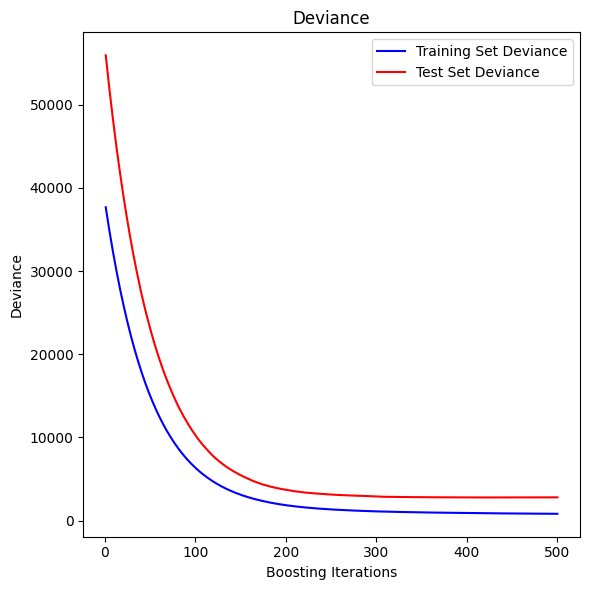

In [438]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

In [439]:
pd.DataFrame({'y': y_test, 'pred': reg.predict(X_test)})

y        pred
19799   41.00   57.441915
19800  185.00  191.075255
19801   70.00   76.357292
19802  318.00  343.729659
19803  162.00  167.889124
...       ...         ...
21158  414.24  402.382016
21159  117.36  146.601971
21160  388.79  373.186364
21161  218.46  209.519008
21162  235.71  247.826015

[1137 rows x 2 columns]

Text(0.5, 1.0, 'Feature Importance (MDI)')

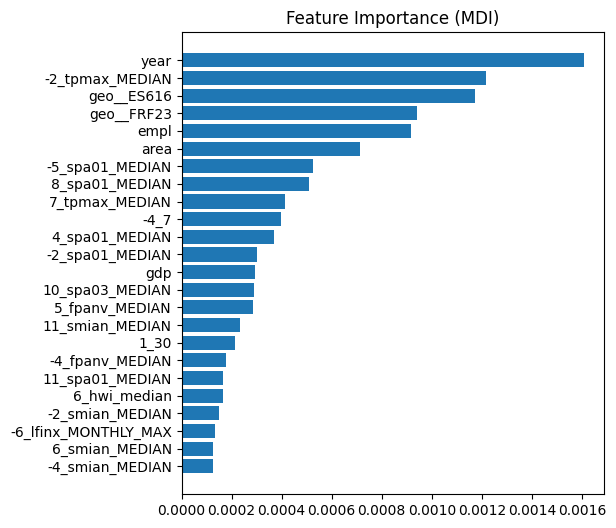

In [454]:
top_n = 25
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)[-top_n:-1]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

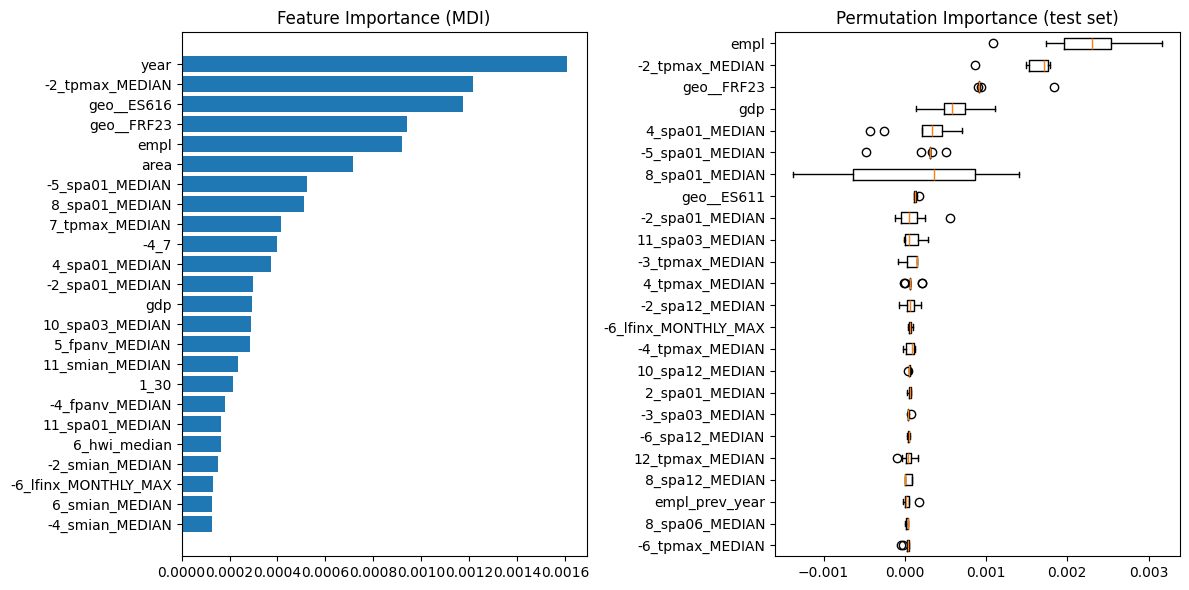

In [455]:
top_n = 25
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)[-top_n:-1]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()[-top_n:-1]
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(X_train.columns)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

# Trying agriculture again, without GVA from the previous year

In [459]:
agriculture_slim = agriculture.drop(['gva_prev_year', 'gdp_prev_year'], axis = 1)

In [460]:
year_split = 2017
X_train = agriculture_slim.loc[agriculture_slim.year <= year_split, agriculture_slim.columns != 'gva']
y_train = agriculture_slim.loc[agriculture_slim.year <= year_split, 'gva']

X_test = agriculture_slim.loc[agriculture_slim.year > year_split, agriculture_slim.columns != 'gva'] 
y_test = agriculture_slim.loc[agriculture_slim.year > year_split, 'gva']

In [461]:
X_train = pd.get_dummies(X_train, columns=['geo'], prefix='geo_')
X_test = pd.get_dummies(X_test, columns=['geo'], prefix='geo_')

In [462]:
regr = RandomForestRegressor(max_depth=4, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, random_state=0)

In [463]:
mse = mean_squared_error(y_test, regr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 18043.7820


In [467]:
pd.DataFrame({'prediction': regr.predict(X_test), 'y': y_test})

prediction       y
19799   27.491052   41.00
19800  145.717014  185.00
19801   85.462683   70.00
19802  343.865875  318.00
19803  149.558054  162.00
...           ...     ...
21158  505.506397  414.24
21159  344.922446  117.36
21160  403.939664  388.79
21161  420.525115  218.46
21162  354.555899  235.71

[1137 rows x 2 columns]

Text(0.5, 1.0, 'Feature Importance (MDI)')

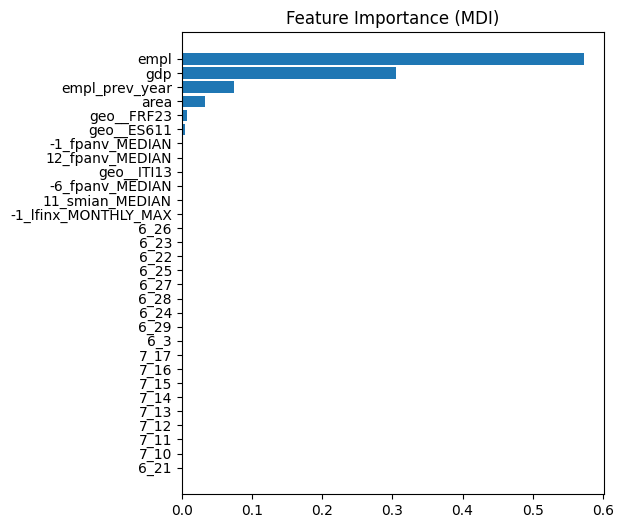

In [472]:
top_n = 30
feature_importance = regr.feature_importances_
sorted_idx = np.argsort(feature_importance)[-top_n:]
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

# Another try ensemble algorithm (linear regression & boosting on residuals)

In [475]:
agriculture

year    geo    area   empl  empl_prev_year       gdp  gdp_prev_year  \
0      2002  AT111   701.0   1.60         1.15625    627.48     774.256875   
1      2002  AT112  1792.0   6.00         5.00000   2849.41    3910.109375   
2      2002  AT113  1471.0   4.80         3.58125   1721.08    2090.191250   
3      2002  AT121  3356.0  12.80        11.13125   4888.71    6473.518750   
4      2002  AT122  3368.0   6.20         5.62500   4977.23    6458.180625   
...     ...    ...     ...    ...             ...       ...            ...   
21158  2018  SK023  6344.0  12.79        12.90000   9123.04    8972.030000   
21159  2018  SK031  6809.0   8.73         8.63000   9812.27    9238.640000   
21160  2018  SK032  9454.0  12.21        12.13000   7840.12    7348.540000   
21161  2018  SK041  8973.0  11.34        11.42000   8632.61    7703.610000   
21162  2018  SK042  6754.0   8.86         8.77000  10702.43   10334.600000   

          gva  gva_prev_year     pop  ...  9_29  9_3  9_30  9_4  9_5  9_6  \
0       37.00        39.7500   37.73  ...   0.0  0.0   0.0  0.0  0.0  0.0   
1      142.00       145.5625  141.15  ...   0.0  0.0   0.0  0.0  0.0  0.0   
2       55.00        54.0625   97.62  ...   0.0  0.0   0.0  0.0  0.0  0.0   
3      243.00       279.0000  237.63  ...   0.0  0.0   0.0  0.0  0.0  0.0   
4      116.00       134.1875  246.48  ...   0.0  0.0   0.0  0.0  0.0  0.0   
...       ...            ...     ...  ...   ...  ...   ...  ...  ...  ...   
21158  414.24       368.9000  677.50  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21159  117.36       131.6000  691.01  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21160  388.79       342.8200  648.85  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21161  218.46       187.9000  824.23  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21162  235.71       216.8200  799.60  ...   0.0  0.0   0.0  0.0  0.0  0.0   

       9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0           0.0  
1      0.0  0.0  0.0           0.0  
2      0.0  0.0  0.0           0.0  
3      0.0  0.0  0.0           0.0  
4      0.0  0.0  0.0           0.0  
...    ...  ...  ...           ...  
21158  0.0  0.0  0.0           0.0  
21159  0.0  0.0  0.0           0.0  
21160  0.0  0.0  0.0           0.0  
21161  0.0  0.0  0.0           0.0  
21162  0.0  0.0  0.0           0.0  

[19271 rows x 723 columns]

In [493]:
agriculture

year    geo    area   empl  empl_prev_year       gdp  gdp_prev_year  \
0      2002  AT111   701.0   1.60         1.15625    627.48     774.256875   
1      2002  AT112  1792.0   6.00         5.00000   2849.41    3910.109375   
2      2002  AT113  1471.0   4.80         3.58125   1721.08    2090.191250   
3      2002  AT121  3356.0  12.80        11.13125   4888.71    6473.518750   
4      2002  AT122  3368.0   6.20         5.62500   4977.23    6458.180625   
...     ...    ...     ...    ...             ...       ...            ...   
21158  2018  SK023  6344.0  12.79        12.90000   9123.04    8972.030000   
21159  2018  SK031  6809.0   8.73         8.63000   9812.27    9238.640000   
21160  2018  SK032  9454.0  12.21        12.13000   7840.12    7348.540000   
21161  2018  SK041  8973.0  11.34        11.42000   8632.61    7703.610000   
21162  2018  SK042  6754.0   8.86         8.77000  10702.43   10334.600000   

          gva  gva_prev_year     pop  ...  9_29  9_3  9_30  9_4  9_5  9_6  \
0       37.00        39.7500   37.73  ...   0.0  0.0   0.0  0.0  0.0  0.0   
1      142.00       145.5625  141.15  ...   0.0  0.0   0.0  0.0  0.0  0.0   
2       55.00        54.0625   97.62  ...   0.0  0.0   0.0  0.0  0.0  0.0   
3      243.00       279.0000  237.63  ...   0.0  0.0   0.0  0.0  0.0  0.0   
4      116.00       134.1875  246.48  ...   0.0  0.0   0.0  0.0  0.0  0.0   
...       ...            ...     ...  ...   ...  ...   ...  ...  ...  ...   
21158  414.24       368.9000  677.50  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21159  117.36       131.6000  691.01  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21160  388.79       342.8200  648.85  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21161  218.46       187.9000  824.23  ...   0.0  0.0   0.0  0.0  0.0  0.0   
21162  235.71       216.8200  799.60  ...   0.0  0.0   0.0  0.0  0.0  0.0   

       9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0           0.0  
1      0.0  0.0  0.0           0.0  
2      0.0  0.0  0.0           0.0  
3      0.0  0.0  0.0           0.0  
4      0.0  0.0  0.0           0.0  
...    ...  ...  ...           ...  
21158  0.0  0.0  0.0           0.0  
21159  0.0  0.0  0.0           0.0  
21160  0.0  0.0  0.0           0.0  
21161  0.0  0.0  0.0           0.0  
21162  0.0  0.0  0.0           0.0  

[19271 rows x 723 columns]

In [516]:
agriculture_scaled = agriculture.loc[:,~agriculture.columns.isin(['geo','year','gva'])]
scaler = MinMaxScaler()
agriculture_scaled = pd.DataFrame(scaler.fit_transform(agriculture_scaled), columns=agriculture_scaled.columns).reset_index(drop=True)
agriculture_scaled

area      empl  empl_prev_year       gdp  gdp_prev_year  \
0      0.006531  0.006849        0.004949  0.002178       0.002918   
1      0.016902  0.025684        0.021403  0.011546       0.016711   
2      0.013851  0.020547        0.015330  0.006789       0.008706   
3      0.031770  0.054792        0.047649  0.020145       0.027986   
4      0.031884  0.026540        0.024079  0.020518       0.027919   
...         ...       ...             ...       ...            ...   
19266  0.060175  0.054749        0.055220  0.037998       0.038976   
19267  0.064595  0.037370        0.036942  0.040904       0.040149   
19268  0.089739  0.052267        0.051924  0.032589       0.031835   
19269  0.085166  0.048542        0.048885  0.035930       0.033397   
19270  0.064072  0.037926        0.037541  0.044657       0.044970   

       gva_prev_year       pop  pop_prev_year  -6_fpanv_MEDIAN  \
0           0.078781  0.004368       0.004397         0.541522   
1           0.118140  0.020091       0.021486         0.454970   
2           0.084105  0.013473       0.013614         0.512876   
3           0.167773  0.034758       0.035737         0.514272   
4           0.113909  0.036104       0.037507         0.538320   
...              ...       ...            ...              ...   
19266       0.201213  0.101631       0.103230         0.335786   
19267       0.112946  0.103685       0.104956         0.401390   
19268       0.191512  0.097276       0.098752         0.441243   
19269       0.133888  0.123938       0.125318         0.474147   
19270       0.144645  0.120194       0.121540         0.577355   

       -5_fpanv_MEDIAN  ...  9_29  9_3  9_30  9_4  9_5  9_6  9_7  9_8  9_9  \
0             0.600199  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             0.546031  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2             0.555237  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             0.580793  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4             0.609978  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   
19266         0.497823  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19267         0.692184  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19268         0.661930  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19269         0.710520  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19270         0.725877  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       9_hwi_median  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
19266           0.0  
19267           0.0  
19268           0.0  
19269           0.0  
19270           0.0  

[19271 rows x 720 columns]

In [520]:
agriculture_dummies = pd.get_dummies(agriculture[['geo','year','gva']], columns=['geo'], prefix='geo_') * 1
agriculture_dummies = agriculture_dummies.reset_index(drop=True)

In [521]:
agriculture_scaled

area      empl  empl_prev_year       gdp  gdp_prev_year  \
0      0.006531  0.006849        0.004949  0.002178       0.002918   
1      0.016902  0.025684        0.021403  0.011546       0.016711   
2      0.013851  0.020547        0.015330  0.006789       0.008706   
3      0.031770  0.054792        0.047649  0.020145       0.027986   
4      0.031884  0.026540        0.024079  0.020518       0.027919   
...         ...       ...             ...       ...            ...   
19266  0.060175  0.054749        0.055220  0.037998       0.038976   
19267  0.064595  0.037370        0.036942  0.040904       0.040149   
19268  0.089739  0.052267        0.051924  0.032589       0.031835   
19269  0.085166  0.048542        0.048885  0.035930       0.033397   
19270  0.064072  0.037926        0.037541  0.044657       0.044970   

       gva_prev_year       pop  pop_prev_year  -6_fpanv_MEDIAN  \
0           0.078781  0.004368       0.004397         0.541522   
1           0.118140  0.020091       0.021486         0.454970   
2           0.084105  0.013473       0.013614         0.512876   
3           0.167773  0.034758       0.035737         0.514272   
4           0.113909  0.036104       0.037507         0.538320   
...              ...       ...            ...              ...   
19266       0.201213  0.101631       0.103230         0.335786   
19267       0.112946  0.103685       0.104956         0.401390   
19268       0.191512  0.097276       0.098752         0.441243   
19269       0.133888  0.123938       0.125318         0.474147   
19270       0.144645  0.120194       0.121540         0.577355   

       -5_fpanv_MEDIAN  ...  9_29  9_3  9_30  9_4  9_5  9_6  9_7  9_8  9_9  \
0             0.600199  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1             0.546031  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2             0.555237  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3             0.580793  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4             0.609978  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...                ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   
19266         0.497823  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19267         0.692184  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19268         0.661930  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19269         0.710520  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
19270         0.725877  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       9_hwi_median  
0               0.0  
1               0.0  
2               0.0  
3               0.0  
4               0.0  
...             ...  
19266           0.0  
19267           0.0  
19268           0.0  
19269           0.0  
19270           0.0  

[19271 rows x 720 columns]

In [522]:
agriculture_dummies

year     gva  geo__AT111  geo__AT112  geo__AT113  geo__AT121  \
0      2002   37.00           1           0           0           0   
1      2002  142.00           0           1           0           0   
2      2002   55.00           0           0           1           0   
3      2002  243.00           0           0           0           1   
4      2002  116.00           0           0           0           0   
...     ...     ...         ...         ...         ...         ...   
19266  2018  414.24           0           0           0           0   
19267  2018  117.36           0           0           0           0   
19268  2018  388.79           0           0           0           0   
19269  2018  218.46           0           0           0           0   
19270  2018  235.71           0           0           0           0   

       geo__AT122  geo__AT123  geo__AT124  geo__AT125  ...  geo__SI043  \
0               0           0           0           0  ...           0   
1               0           0           0           0  ...           0   
2               0           0           0           0  ...           0   
3               0           0           0           0  ...           0   
4               1           0           0           0  ...           0   
...           ...         ...         ...         ...  ...         ...   
19266           0           0           0           0  ...           0   
19267           0           0           0           0  ...           0   
19268           0           0           0           0  ...           0   
19269           0           0           0           0  ...           0   
19270           0           0           0           0  ...           0   

       geo__SI044  geo__SK010  geo__SK021  geo__SK022  geo__SK023  geo__SK031  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
19266           0           0           0           0           1           0   
19267           0           0           0           0           0           1   
19268           0           0           0           0           0           0   
19269           0           0           0           0           0           0   
19270           0           0           0           0           0           0   

       geo__SK032  geo__SK041  geo__SK042  
0               0           0           0  
1               0           0           0  
2               0           0           0  
3               0           0           0  
4               0           0           0  
...           ...         ...         ...  
19266           0           0           0  
19267           0           0           0  
19268           1           0           0  
19269           0           1           0  
19270           0           0           1  

[19271 rows x 1139 columns]

In [524]:
agriculture_scaled_dummied = pd.concat([agriculture_scaled, agriculture_dummies], axis = 1)

In [525]:
year_split = 2017
X_train = agriculture_scaled_dummied.loc[agriculture_scaled_dummied.year <= year_split, agriculture_scaled_dummied.columns != 'gva']
y_train = agriculture_scaled_dummied.loc[agriculture_scaled_dummied.year <= year_split, 'gva']

X_test = agriculture_scaled_dummied.loc[agriculture_scaled_dummied.year > year_split, agriculture_scaled_dummied.columns != 'gva'] 
y_test = agriculture_scaled_dummied.loc[agriculture_scaled_dummied.year > year_split, 'gva']

In [526]:
linear_regression = LinearRegression().fit(X_train, y_train)

In [527]:
mean_squared_error(linear_regression.predict(X_test), y_test)

1857.257598603405

In [531]:
coefficients_linear_regression = pd.DataFrame({'Indicator': X_train.columns, 'Coefficient': linear_regression.coef_, 'Coefficient_Absolute': np.abs(linear_regression.coef_)})

In [534]:
coefficients_linear_regression.sort_values('Coefficient_Absolute', ascending = False)[:15]

Indicator   Coefficient  Coefficient_Absolute
183  -1_hwi_median  7.620557e+12          7.620557e+12
214  -2_hwi_median -5.018909e+12          5.018909e+12
277  -4_hwi_median  3.585209e+12          3.585209e+12
309  -5_hwi_median  3.494024e+12          3.494024e+12
688   8_hwi_median -2.765714e+12          2.765714e+12
341  -6_hwi_median -2.358708e+12          2.358708e+12
436  12_hwi_median -2.220987e+12          2.220987e+12
498   2_hwi_median -1.862553e+12          1.862553e+12
468   1_hwi_median -1.573540e+12          1.573540e+12
373  10_hwi_median -1.453976e+12          1.453976e+12
182           -1_9 -1.439422e+12          1.439422e+12
246  -3_hwi_median -1.412735e+12          1.412735e+12
561   4_hwi_median -1.391819e+12          1.391819e+12
163           -1_2 -1.366152e+12          1.366152e+12
164          -1_20 -1.287229e+12          1.287229e+12

In [537]:
LR_residuals = pd.DataFrame({'LR_pred_train': linear_regression.predict(X_train), 'y_train': y_train})
LR_residuals['residuals'] = LR_residuals.LR_pred_train - y_train
LR_residuals

LR_pred_train  y_train  residuals
0          27.414581    37.00  -9.585419
1         126.241684   142.00 -15.758316
2          57.638367    55.00   2.638367
3         263.462555   243.00  20.462555
4         111.263748   116.00  -4.736252
...              ...      ...        ...
18129     364.472824   368.90  -4.427176
18130     135.687836   131.60   4.087836
18131     320.089645   342.82 -22.730355
18132     200.454758   187.90  12.554758
18133     184.320526   216.82 -32.499474

[18134 rows x 3 columns]

In [545]:
# Dropping the economic data, to try to predict residuals from climate data
X_train_res = X_train.loc[:,~X_train.columns.isin(['empl', 'empl_prev_year', 'gdp', 'gdp_prev_year', 'gva_prev_year', 'pop', 'pop_prev_year'])]

In [546]:
X_train_res

area  -6_fpanv_MEDIAN  -5_fpanv_MEDIAN  -4_fpanv_MEDIAN  \
0      0.006531         0.541522         0.600199         0.523123   
1      0.016902         0.454970         0.546031         0.471147   
2      0.013851         0.512876         0.555237         0.491224   
3      0.031770         0.514272         0.580793         0.532340   
4      0.031884         0.538320         0.609978         0.523924   
...         ...              ...              ...              ...   
18129  0.060175         0.498876         0.826496         0.810772   
18130  0.064595         0.473534         0.659638         0.720846   
18131  0.089739         0.483957         0.666743         0.701371   
18132  0.085166         0.445534         0.595003         0.661217   
18133  0.064072         0.444308         0.617465         0.698966   

       -3_fpanv_MEDIAN  -2_fpanv_MEDIAN  -1_fpanv_MEDIAN  1_fpanv_MEDIAN  \
0             0.508573         0.522688         0.517600        0.564834   
1             0.462474         0.432479         0.482888        0.553627   
2             0.504173         0.539627         0.510035        0.578648   
3             0.552601         0.461849         0.478278        0.557510   
4             0.530927         0.463092         0.489480        0.567076   
...                ...              ...              ...             ...   
18129         0.554736         0.427040         0.415366        0.544061   
18130         0.528144         0.108625         0.433412        0.745849   
18131         0.486413         0.376923         0.288180        0.577997   
18132         0.360443         0.211655         0.433412        0.586024   
18133         0.444293         0.263869         0.433412        0.493158   

       2_fpanv_MEDIAN  3_fpanv_MEDIAN  ...  geo__SI043  geo__SI044  \
0            0.517957        0.497971  ...           0           0   
1            0.521386        0.482317  ...           0           0   
2            0.530687        0.520499  ...           0           0   
3            0.537600        0.519530  ...           0           0   
4            0.525639        0.505723  ...           0           0   
...               ...             ...  ...         ...         ...   
18129        0.504705        0.519500  ...           0           0   
18130        0.621471        0.651123  ...           0           0   
18131        0.479931        0.609368  ...           0           0   
18132        0.511235        0.520136  ...           0           0   
18133        0.389668        0.463544  ...           0           0   

       geo__SK010  geo__SK021  geo__SK022  geo__SK023  geo__SK031  geo__SK032  \
0               0           0           0           0           0           0   
1               0           0           0           0           0           0   
2               0           0           0           0           0           0   
3               0           0           0           0           0           0   
4               0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
18129           0           0           0           1           0           0   
18130           0           0           0           0           1           0   
18131           0           0           0           0           0           1   
18132           0           0           0           0           0           0   
18133           0           0           0           0           0           0   

       geo__SK041  geo__SK042  
0               0           0  
1               0           0  
2               0           0  
3               0           0  
4               0           0  
...           ...         ...  
18129           0           0  
18130           0           0  
18131           0           0  
18132           1           0  
18133           0           1  

[18134 rows x 1851 columns]

In [559]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
    "min"
}
BoostingResiduals = ensemble.GradientBoostingRegressor(**params)
BoostingResiduals.fit(X_train_res, LR_residuals.residuals)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [560]:
BoostingResiduals.predict(X_train_res)

array([-0.17861515, -0.27526354, -0.17861515, ..., -1.97141072,
       -1.97141072, -1.7988492 ])

In [562]:
LR_residuals['Boosting_pred_residuals'] = BoostingResiduals.predict(X_train_res)

In [563]:
LR_residuals

LR_pred_train  y_train  residuals  Boosting_pred_residuals
0          27.414581    37.00  -9.585419                -0.178615
1         126.241684   142.00 -15.758316                -0.275264
2          57.638367    55.00   2.638367                -0.178615
3         263.462555   243.00  20.462555                -0.034921
4         111.263748   116.00  -4.736252                 0.160404
...              ...      ...        ...                      ...
18129     364.472824   368.90  -4.427176                -1.798849
18130     135.687836   131.60   4.087836                -2.045770
18131     320.089645   342.82 -22.730355                -1.971411
18132     200.454758   187.90  12.554758                -1.971411
18133     184.320526   216.82 -32.499474                -1.798849

[18134 rows x 4 columns]

In [565]:
dump(linear_regression, '../linear_regression_model.joblib') 

['../linear_regression_model.joblib']

In [566]:
dump(BoostingResiduals, '../boosting_residuals.joblib')

['../boosting_residuals.joblib']

In [573]:
LR_residuals['LR_Boosting'] = linear_regression.predict(X_train) + BoostingResiduals.predict(X_train_res) * -1

In [574]:
LR_residuals

LR_pred_train  y_train  residuals  Boosting_pred_residuals  LR_Boosting
0          27.414581    37.00  -9.585419                -0.178615    27.593196
1         126.241684   142.00 -15.758316                -0.275264   126.516948
2          57.638367    55.00   2.638367                -0.178615    57.816982
3         263.462555   243.00  20.462555                -0.034921   263.497476
4         111.263748   116.00  -4.736252                 0.160404   111.103345
...              ...      ...        ...                      ...          ...
18129     364.472824   368.90  -4.427176                -1.798849   366.271673
18130     135.687836   131.60   4.087836                -2.045770   137.733606
18131     320.089645   342.82 -22.730355                -1.971411   322.061056
18132     200.454758   187.90  12.554758                -1.971411   202.426168
18133     184.320526   216.82 -32.499474                -1.798849   186.119375

[18134 rows x 5 columns]

## Train Error MSE (LR) and (LR+Boost)

In [575]:
mean_squared_error(LR_residuals.LR_pred_train, LR_residuals.y_train)

912.2837080194201

In [576]:
mean_squared_error(LR_residuals.LR_Boosting, LR_residuals.y_train)

751.2321388650766

## Test Error MSE (LR) and (LR+Boost)

In [581]:
test_MSE = pd.DataFrame({'y_test': y_test,'LR_pred': linear_regression.predict(X_test)})
test_MSE

y_test     LR_pred
18134   41.00   75.733566
18135  185.00  196.926590
18136   70.00   78.528824
18137  318.00  300.394089
18138  162.00  164.518768
...       ...         ...
19266  414.24  336.824890
19267  117.36  108.830170
19268  388.79  302.224823
19269  218.46  184.231827
19270  235.71  195.283829

[1137 rows x 2 columns]

In [583]:
X_test_res = X_test.loc[:,~X_test.columns.isin(['empl', 'empl_prev_year', 'gdp', 'gdp_prev_year', 'gva_prev_year', 'pop', 'pop_prev_year'])]

area  -6_fpanv_MEDIAN  -5_fpanv_MEDIAN  -4_fpanv_MEDIAN  \
18134  0.006531         0.636419         0.707999         0.418610   
18135  0.016902         0.405886         0.551914         0.267372   
18136  0.013851         0.613530         0.683475         0.284203   
18137  0.031770         0.364194         0.656887         0.587401   
18138  0.031884         0.597793         0.655283         0.474874   
...         ...              ...              ...              ...   
19266  0.060175         0.335786         0.497823         0.386151   
19267  0.064595         0.401390         0.692184         0.490503   
19268  0.089739         0.441243         0.661930         0.430873   
19269  0.085166         0.474147         0.710520         0.555422   
19270  0.064072         0.577355         0.725877         0.542198   

       -3_fpanv_MEDIAN  -2_fpanv_MEDIAN  -1_fpanv_MEDIAN  1_fpanv_MEDIAN  \
18134         0.612578         0.541725         0.509929        0.648057   
18135         0.477873         0.530536         0.639953        0.469987   
18136         0.546778         0.559441         0.543972        0.597336   
18137         0.546390         0.362238         0.512057        0.622514   
18138         0.509123         0.405594         0.411584        0.596059   
...                ...              ...              ...             ...   
19266         0.619759         0.708392         0.659811        0.748586   
19267         0.486607         0.461538         0.560047        0.499909   
19268         0.604425         0.683916         0.413712        0.549352   
19269         0.568517         0.618182         0.560047        0.561029   
19270         0.611995         0.642424         0.560047        0.677978   

       2_fpanv_MEDIAN  3_fpanv_MEDIAN  ...  geo__SI043  geo__SI044  \
18134        0.439408        0.266638  ...           0           0   
18135        0.515844        0.349089  ...           0           0   
18136        0.366622        0.243959  ...           0           0   
18137        0.581909        0.355871  ...           0           0   
18138        0.485308        0.279356  ...           0           0   
...               ...             ...  ...         ...         ...   
19266        0.676973        0.439381  ...           0           0   
19267        0.392356        0.442984  ...           0           0   
19268        0.469752        0.312844  ...           0           0   
19269        0.475130        0.343366  ...           0           0   
19270        0.557519        0.339127  ...           0           0   

       geo__SK010  geo__SK021  geo__SK022  geo__SK023  geo__SK031  geo__SK032  \
18134           0           0           0           0           0           0   
18135           0           0           0           0           0           0   
18136           0           0           0           0           0           0   
18137           0           0           0           0           0           0   
18138           0           0           0           0           0           0   
...           ...         ...         ...         ...         ...         ...   
19266           0           0           0           1           0           0   
19267           0           0           0           0           1           0   
19268           0           0           0           0           0           1   
19269           0           0           0           0           0           0   
19270           0           0           0           0           0           0   

       geo__SK041  geo__SK042  
18134           0           0  
18135           0           0  
18136           0           0  
18137           0           0  
18138           0           0  
...           ...         ...  
19266           0           0  
19267           0           0  
19268           0           0  
19269           1           0  
19270           0           1  

[1137 rows x 1851 columns]

In [585]:
test_MSE['Boosting_pred_residuals'] = BoostingResiduals.predict(X_test_res)

In [587]:
test_MSE['LR_Boosting'] = test_MSE.LR_pred + (test_MSE.Boosting_pred_residuals * -1)

In [588]:
test_MSE

y_test     LR_pred  Boosting_pred_residuals  LR_Boosting
18134   41.00   75.733566                -0.613248    76.346815
18135  185.00  196.926590                -0.613248   197.539838
18136   70.00   78.528824                -0.361844    78.890667
18137  318.00  300.394089                 1.448326   298.945763
18138  162.00  164.518768                 0.999252   163.519516
...       ...         ...                      ...          ...
19266  414.24  336.824890                -1.606034   338.430924
19267  117.36  108.830170                -1.705808   110.535978
19268  388.79  302.224823                -1.709906   303.934729
19269  218.46  184.231827                -1.787726   186.019553
19270  235.71  195.283829                -1.862086   197.145914

[1137 rows x 4 columns]

In [589]:
mean_squared_error(test_MSE.y_test, test_MSE.LR_pred)

1857.257598603405

In [590]:
mean_squared_error(test_MSE.y_test, test_MSE.LR_Boosting)

1960.614646862023

### Train MSE went down while Test MSE went up

In [594]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train_res, label=LR_residuals.residuals)
dtest = xgb.DMatrix(X_test_res, label=linear_regression.predict(X_test) - y_test)

# Set up parameters including min_child_weight
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'min_child_weight': 5,  # Set the min_child_weight
    'learning_rate': 0.1,
    'n_estimators': 100
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict and evaluate
preds = bst.predict(dtest)
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")

/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/python_hackathon_3.10/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:36:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Squared Error: 92694.39211305711


In [607]:
test_MSE_2 = pd.DataFrame({'y_test': y_test, 
              'LR': linear_regression.predict(X_test), 
              'Predicted_residuals': bst.predict(dtest), 
              'LR_Boost': linear_regression.predict(X_test) + (bst.predict(dtest)*-1)})

## Test MSE went down!

In [608]:
mean_squared_error(test_MSE_2.LR, test_MSE_2.y_test)

1857.257598603405

In [609]:
mean_squared_error(test_MSE_2.LR_Boost, test_MSE_2.y_test)

1791.9896767546466

# Try model on full dataset

In [612]:
final_agri = pd.read_csv('../final_version/full_agriculture_1_year_6_month_window_imputed.csv')
final_agri.drop('Unnamed: 0', axis=1, inplace=True)
final_agri

year    geo    area       empl  empl_prev_year       gdp  \
0      2002  AT111   701.0   1.600000        1.116667    627.48   
1      2002  AT112  1792.0   6.000000        4.927778   2849.41   
2      2002  AT113  1471.0   4.800000        3.427778   1721.08   
3      2002  AT121  3356.0  12.800000       10.822222   4888.71   
4      2002  AT122  3368.0   6.200000        5.488889   4977.23   
...     ...    ...     ...        ...             ...       ...   
22259  2021  SK023  6344.0  14.888947       12.460000  10052.05   
22260  2021  SK031  6809.0   8.312105        8.620000  10997.65   
22261  2021  SK032  9454.0  12.965789       12.090000   8694.03   
22262  2021  SK041  8973.0  12.145789       11.090000   8985.50   
22263  2021  SK042  6754.0   9.474211        8.620000  12042.57   

       gdp_prev_year     gva  gva_prev_year     pop  ...  9_29  9_3  9_30  \
0         800.195556   37.00      39.666667   37.73  ...   0.0  0.0   0.0   
1        4071.486111  142.00     148.166667  141.15  ...   0.0  0.0   0.0   
2        2160.713333   55.00      55.944444   97.62  ...   0.0  0.0   0.0   
3        6714.447778  243.00     282.888889  237.63  ...   0.0  0.0   0.0   
4        6682.971111  116.00     136.611111  246.48  ...   0.0  0.0   0.0   
...              ...     ...            ...     ...  ...   ...  ...   ...   
22259    9927.200000  333.19     329.210000  674.95  ...   0.0  0.0   0.0   
22260   10265.260000  121.46     131.780000  690.73  ...   0.0  0.0   0.0   
22261    7915.680000  335.42     313.000000  623.25  ...   0.0  0.0   0.0   
22262    8613.020000  204.57     186.110000  808.46  ...   0.0  0.0   0.0   
22263   11290.920000  208.22     183.780000  781.05  ...   0.0  0.0   0.0   

       9_4  9_5  9_6  9_7  9_8  9_9  9_hwi_median  
0      0.0  0.0  0.0  0.0  0.0  0.0           0.0  
1      0.0  0.0  0.0  0.0  0.0  0.0           0.0  
2      0.0  0.0  0.0  0.0  0.0  0.0           0.0  
3      0.0  0.0  0.0  0.0  0.0  0.0           0.0  
4      0.0  0.0  0.0  0.0  0.0  0.0           0.0  
...    ...  ...  ...  ...  ...  ...           ...  
22259  0.0  0.0  0.0  0.0  0.0  0.0           0.0  
22260  0.0  0.0  0.0  0.0  0.0  0.0           0.0  
22261  0.0  0.0  0.0  0.0  0.0  0.0           0.0  
22262  0.0  0.0  0.0  0.0  0.0  0.0           0.0  
22263  0.0  0.0  0.0  0.0  0.0  0.0           0.0  

[22264 rows x 723 columns]

In [618]:
final_agri = final_agri.loc[final_agri.year >= 2018, final_agri.columns != 'gva'] 

In [619]:
final_agri

year    geo    area       empl  empl_prev_year       gdp  \
18526  2018  AT111   701.0   0.800000            0.80    998.25   
18527  2018  AT112  1792.0   4.400000            4.60   5272.15   
18528  2018  AT113  1471.0   2.200000            2.40   2690.35   
18529  2018  AT121  3356.0   8.600000            9.30   8479.53   
18530  2018  AT122  3368.0   4.500000            4.90   8348.59   
...     ...    ...     ...        ...             ...       ...   
22259  2021  SK023  6344.0  14.888947           12.46  10052.05   
22260  2021  SK031  6809.0   8.312105            8.62  10997.65   
22261  2021  SK032  9454.0  12.965789           12.09   8694.03   
22262  2021  SK041  8973.0  12.145789           11.09   8985.50   
22263  2021  SK042  6754.0   9.474211            8.62  12042.57   

       gdp_prev_year  gva_prev_year     pop  pop_prev_year  ...  9_29  9_3  \
18526         997.92          53.00   37.55          37.72  ...   0.0  0.0   
18527        5097.25         182.00  158.38         157.15  ...   0.0  0.0   
18528        2622.63          74.00   97.03          97.28  ...   0.0  0.0   
18529        8321.99         331.00  246.30         245.83  ...   0.0  0.0   
18530        7983.37         156.00  260.00         259.52  ...   0.0  0.0   
...              ...            ...     ...            ...  ...   ...  ...   
22259        9927.20         329.21  674.95         673.11  ...   0.0  0.0   
22260       10265.26         131.78  690.73         691.63  ...   0.0  0.0   
22261        7915.68         313.00  623.25         644.39  ...   0.0  0.0   
22262        8613.02         186.11  808.46         827.00  ...   0.0  0.0   
22263       11290.92         183.78  781.05         801.77  ...   0.0  0.0   

       9_30  9_4  9_5  9_6  9_7  9_8  9_9  9_hwi_median  
18526   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
18527   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
18528   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
18529   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
18530   0.0  0.0  0.0  0.0  0.0  0.0  0.0      1.317082  
...     ...  ...  ...  ...  ...  ...  ...           ...  
22259   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
22260   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
22261   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
22262   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  
22263   0.0  0.0  0.0  0.0  0.0  0.0  0.0      0.000000  

[3738 rows x 722 columns]

In [620]:
final_agri_scaled = final_agri.loc[:,~final_agri.columns.isin(['geo','year'])]
scaler = MinMaxScaler()
final_agri_scaled = pd.DataFrame(scaler.fit_transform(final_agri_scaled), columns=final_agri_scaled.columns).reset_index(drop=True)
final_agri_scaled

area      empl  empl_prev_year       gdp  gdp_prev_year  \
0     0.006531  0.004915        0.004915  0.003259       0.003300   
1     0.016902  0.027034        0.028262  0.020157       0.019913   
2     0.013851  0.013517        0.014746  0.009949       0.009884   
3     0.031770  0.052839        0.057139  0.032838       0.032982   
4     0.031884  0.027648        0.030106  0.032320       0.031609   
...        ...       ...             ...       ...            ...   
3733  0.060175  0.091478        0.076554  0.039055       0.039487   
3734  0.064595  0.051070        0.052961  0.042794       0.040857   
3735  0.089739  0.079662        0.074281  0.033686       0.031335   
3736  0.085166  0.074624        0.068137  0.034838       0.034161   
3737  0.064072  0.058210        0.052961  0.046925       0.045014   

      gva_prev_year       pop  pop_prev_year  -6_fpanv_MEDIAN  \
0          0.021062  0.005557       0.004018         0.671585   
1          0.072326  0.023439       0.021908         0.433811   
2          0.029407  0.014360       0.012940         0.647976   
3          0.131537  0.036451       0.035192         0.390809   
4          0.061993  0.038479       0.037243         0.631745   
...             ...       ...            ...              ...   
3733       0.130826  0.099889       0.099199         0.482715   
3734       0.052368  0.102224       0.101973         0.517074   
3735       0.124384  0.092238       0.094896         0.464376   
3736       0.073959  0.119648       0.122251         0.510750   
3737       0.073033  0.115591       0.118472         0.506745   

      -5_fpanv_MEDIAN  ...  9_29  9_3  9_30  9_4  9_5  9_6  9_7  9_8  9_9  \
0            0.664750  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1            0.529738  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2            0.643537  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3            0.620539  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4            0.619151  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
...               ...  ...   ...  ...   ...  ...  ...  ...  ...  ...  ...   
3733         0.646511  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3734         0.632831  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3735         0.657415  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3736         0.678826  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3737         0.672879  ...   0.0  0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      9_hwi_median  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.080949  
...            ...  
3733      0.000000  
3734      0.000000  
3735      0.000000  
3736      0.000000  
3737      0.000000  

[3738 rows x 720 columns]

In [621]:
final_agri_dummies = pd.get_dummies(final_agri[['geo','year']], columns=['geo'], prefix='geo_') * 1
final_agri_dummies = final_agri_dummies.reset_index(drop=True)

In [622]:
final_agri_dummies

year  geo__AT111  geo__AT112  geo__AT113  geo__AT121  geo__AT122  \
0     2018           1           0           0           0           0   
1     2018           0           1           0           0           0   
2     2018           0           0           1           0           0   
3     2018           0           0           0           1           0   
4     2018           0           0           0           0           1   
...    ...         ...         ...         ...         ...         ...   
3733  2021           0           0           0           0           0   
3734  2021           0           0           0           0           0   
3735  2021           0           0           0           0           0   
3736  2021           0           0           0           0           0   
3737  2021           0           0           0           0           0   

      geo__AT123  geo__AT124  geo__AT125  geo__AT126  ...  geo__SI043  \
0              0           0           0           0  ...           0   
1              0           0           0           0  ...           0   
2              0           0           0           0  ...           0   
3              0           0           0           0  ...           0   
4              0           0           0           0  ...           0   
...          ...         ...         ...         ...  ...         ...   
3733           0           0           0           0  ...           0   
3734           0           0           0           0  ...           0   
3735           0           0           0           0  ...           0   
3736           0           0           0           0  ...           0   
3737           0           0           0           0  ...           0   

      geo__SI044  geo__SK010  geo__SK021  geo__SK022  geo__SK023  geo__SK031  \
0              0           0           0           0           0           0   
1              0           0           0           0           0           0   
2              0           0           0           0           0           0   
3              0           0           0           0           0           0   
4              0           0           0           0           0           0   
...          ...         ...         ...         ...         ...         ...   
3733           0           0           0           0           1           0   
3734           0           0           0           0           0           1   
3735           0           0           0           0           0           0   
3736           0           0           0           0           0           0   
3737           0           0           0           0           0           0   

      geo__SK032  geo__SK041  geo__SK042  
0              0           0           0  
1              0           0           0  
2              0           0           0  
3              0           0           0  
4              0           0           0  
...          ...         ...         ...  
3733           0           0           0  
3734           0           0           0  
3735           1           0           0  
3736           0           1           0  
3737           0           0           1  

[3738 rows x 1167 columns]

In [623]:
final_agri_scaled_dummied = pd.concat([final_agri_scaled, final_agri_dummies], axis = 1)

In [632]:
difference = list(set(final_agri_scaled_dummied.columns.to_list()) - set(X_train.columns.to_list()))

In [638]:
final_agri_scaled_dummied_s = final_agri_scaled_dummied.loc[:,~final_agri_scaled_dummied.columns.isin(difference)]

In [648]:
pd.set_option('display.max_columns', None)
final_agri_scaled_dummied_s

area      empl  empl_prev_year       gdp  gdp_prev_year  \
0     0.006531  0.004915        0.004915  0.003259       0.003300   
1     0.016902  0.027034        0.028262  0.020157       0.019913   
2     0.013851  0.013517        0.014746  0.009949       0.009884   
3     0.031770  0.052839        0.057139  0.032838       0.032982   
4     0.031884  0.027648        0.030106  0.032320       0.031609   
...        ...       ...             ...       ...            ...   
3733  0.060175  0.091478        0.076554  0.039055       0.039487   
3734  0.064595  0.051070        0.052961  0.042794       0.040857   
3735  0.089739  0.079662        0.074281  0.033686       0.031335   
3736  0.085166  0.074624        0.068137  0.034838       0.034161   
3737  0.064072  0.058210        0.052961  0.046925       0.045014   

      gva_prev_year       pop  pop_prev_year  -6_fpanv_MEDIAN  \
0          0.021062  0.005557       0.004018         0.671585   
1          0.072326  0.023439       0.021908         0.433811   
2          0.029407  0.014360       0.012940         0.647976   
3          0.131537  0.036451       0.035192         0.390809   
4          0.061993  0.038479       0.037243         0.631745   
...             ...       ...            ...              ...   
3733       0.130826  0.099889       0.099199         0.482715   
3734       0.052368  0.102224       0.101973         0.517074   
3735       0.124384  0.092238       0.094896         0.464376   
3736       0.073959  0.119648       0.122251         0.510750   
3737       0.073033  0.115591       0.118472         0.506745   

      -5_fpanv_MEDIAN  -4_fpanv_MEDIAN  -3_fpanv_MEDIAN  -2_fpanv_MEDIAN  \
0            0.664750         0.430329         0.660113         0.582141   
1            0.529738         0.303489         0.514955         0.571738   
2            0.643537         0.317604         0.589207         0.598613   
3            0.620539         0.571889         0.588789         0.415258   
4            0.619151         0.477516         0.548630         0.455570   
...               ...              ...              ...              ...   
3733         0.646511         0.728776         0.643798         0.745557   
3734         0.632831         0.726154         0.495294         0.730603   
3735         0.657415         0.722928         0.555532         0.739489   
3736         0.678826         0.745513         0.696716         0.763546   
3737         0.672879         0.781206         0.710730         0.819896   

      -1_fpanv_MEDIAN  1_fpanv_MEDIAN  2_fpanv_MEDIAN  3_fpanv_MEDIAN  \
0            0.523702        0.634671        0.343133        0.258848   
1            0.648446        0.467976        0.420116        0.338889   
2            0.556362        0.587190        0.269826        0.236831   
3            0.525743        0.610760        0.486654        0.345473   
4            0.429349        0.585995        0.389362        0.271193   
...               ...             ...             ...             ...   
3733         0.613971        0.601196        0.536944        0.591770   
3734         0.618791        0.450043        0.515474        0.615638   
3735         0.837605        0.573015        0.533849        0.613580   
3736         0.618791        0.396243        0.480077        0.572428   
3737         0.618791        0.443382        0.331721        0.530658   

      4_fpanv_MEDIAN  5_fpanv_MEDIAN  6_fpanv_MEDIAN  7_fpanv_MEDIAN  \
0           0.557996        0.549934        0.461422        0.536678   
1           0.522764        0.521825        0.493841        0.573567   
2           0.596660        0.495370        0.423384        0.443929   
3           0.594372        0.594246        0.440674        0.487985   
4           0.677191        0.533069        0.421656        0.574831   
...              ...             ...             ...             ...   
3733        0.420270        0.327546        0.535768        0.604764   
3734        0.431251        0.2015

In [659]:
linear_regression.predict(final_agri_scaled_dummied_s[X_train.columns])

array([ 3.21630538e+11,  3.68293039e+11,  2.82249121e+11, ...,
       -9.04797636e+10,  2.49089169e+10, -1.13423812e+11])

In [668]:
for col in X_train.columns:
    print(f"Max X_train {col} {X_train[col].max()}")
    print(f"Min X_train {col} {X_train[col].min()}")
    print(f"Max final {col} {final_agri_scaled_dummied_s[col].max()}")
    print(f"Min final {col} {final_agri_scaled_dummied_s[col].min()}")

Max X_train area 1.0
Min X_train area 0.0
Max final area 1.0
Min final area 0.0
Max X_train empl 1.0
Min X_train empl 0.0
Max final empl 1.0
Min final empl 0.0
Max X_train empl_prev_year 1.0
Min X_train empl_prev_year 0.0
Max final empl_prev_year 1.0
Min final empl_prev_year 0.0
Max X_train gdp 0.9585702846181337
Min X_train gdp 0.0
Max final gdp 1.0000000000000002
Min final gdp 0.0
Max X_train gdp_prev_year 0.9670396552786621
Min X_train gdp_prev_year 0.0
Max final gdp_prev_year 1.0000000000000002
Min final gdp_prev_year 0.0
Max X_train gva_prev_year 0.9081626959772359
Min X_train gva_prev_year 0.0
Max final gva_prev_year 1.0
Min final gva_prev_year 0.0
Max X_train pop 0.9875488392599238
Min X_train pop 0.0
Max final pop 1.0
Min final pop 0.0
Max X_train pop_prev_year 0.990871024354198
Min X_train pop_prev_year 0.0
Max final pop_prev_year 1.0
Min final pop_prev_year 0.0
Max X_train -6_fpanv_MEDIAN 1.0
Min X_train -6_fpanv_MEDIAN 0.0
Max final -6_fpanv_MEDIAN 1.0
Min final -6_fpanv_MED

In [658]:
linear_regression.predict(X_train)

array([ 27.4145813 , 126.24168396,  57.6383667 , ..., 320.08964539,
       200.45475769, 184.32052612])

In [640]:
pd.DataFrame({'LR_prediction': linear_regression.predict(final_agri_scaled_dummied_s)})

LR_prediction
0      3.216305e+11
1      3.682930e+11
2      2.822491e+11
3      1.922722e+11
4      3.591913e+11
...             ...
3733  -8.029555e+10
3734  -1.222810e+11
3735  -9.047976e+10
3736   2.490892e+10
3737  -1.134238e+11

[3738 rows x 1 columns]

In [644]:
final_agri.gva

AttributeError: 'DataFrame' object has no attribute 'gva'

In [635]:
final_agri_scaled_dummied.shape

(3738, 1887)

In [173]:
feature_importance=pd.DataFrame({'feature': reg.feature_names_in_, 'importance': reg.feature_importances_}).sort_values(by='importance')

In [178]:
feature_importance

feature  importance
1192  geo__FR414    0.000000
1205  geo__FR522    0.000000
1204  geo__FR521    0.000000
1203  geo__FR515    0.000000
1202  geo__FR514    0.000000
...          ...         ...
502   geo__ATZZZ    0.006826
1351  geo__FRZZZ    0.013125
2           empl    0.025194
3            gdp    0.041142
4            pop    0.902804

[1831 rows x 2 columns]

In [160]:
feature_importance[sorted_idx]

array([0.        , 0.        , 0.        , ..., 0.02519387, 0.04114155,
       0.90280376])

In [166]:
reg.feature_names_in_

array(['year', 'area', 'empl', ..., 'geo__SK032', 'geo__SK041',
       'geo__SK042'], dtype=object)

Text(0.5, 1.0, 'Feature Importance (MDI)')

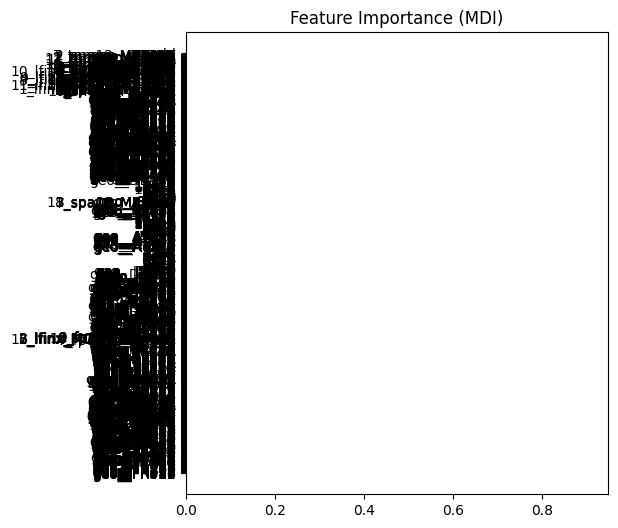

In [159]:

pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importances[sorted_idx], align="center")
plt.yticks(pos, np.array(X_train.columns)[sorted_idx])
plt.title("Feature Importance (MDI)")

In [153]:
np.arange(feature_importances_sorted_idx.shape[0]) + 0.5

array([5.0000e-01, 1.5000e+00, 2.5000e+00, ..., 1.8285e+03, 1.8295e+03,
       1.8305e+03])